In [1]:
import json
import pandas
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format='retina'
#%load_ext nb_black


In [2]:
data = []
with open('/kaggle/input/how-long-to-beat-video-games/hltb.jsonlines') as lines:
        for line in lines:
                data.append(json.loads(line)) 


In [3]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

,Name,Stats,steam_app_id,Release_date,Genres,Review_score
0,Borderlands 3,{'Additional Content': {'Moxxi's Heist of the ...,397540,2019-09-13,"First-Person, Action, Shooter",76
1,Dying Light,{'Additional Content': {'The Following': {'Pol...,239140,2015-01-27,"Action, Adventure, Open World, Survival Horror",78
2,Middle-Earth: Shadow of War,{'Additional Content': {'Blade of Galadriel': ...,356190,2017-10-10,"Action, Adventure",76
3,Counter-Strike: Global Offensive,"{'Multi-Player': {'Co-Op': {'Polled': '34', 'A...",730,2012-08-21,"First-Person, Shooter",74
4,Grand Theft Auto IV,{'Additional Content': {'The Lost and Damned':...,5152,2008-04-29,"Third-Person, Action, Sandbox, Shooter",82


In [4]:
#Convert nested dict into list of dicts format
#. I.e. {"Platform": {"Playstation 5": 5 hrs}} into [{"Platform_Playstation": 5}]
#test = df.iloc[0].Stats
def convert(list_dicts):
    total_dict = {}
    for h in list_dicts.keys():
        dict_1 = list_dicts[h].items()
        for i,j in dict_1: 
            for k,l in j.items():
                total_dict.update({f'{h}_{i}_{k}': l})
    return  total_dict
    
#convert(test)

In [5]:
total =  df.Stats.apply(lambda x: convert(x)).to_list()

In [6]:
#Let's find all the avaialable platforms
total =  df.Stats.apply(lambda x: convert(x)).to_list()
consoles_list = set([g.split('_')[1] for i in total for g in i.keys()  if "Platform" in g])
consoles_list

{'3DO',
 'Amazon Luna',
 'Amiga',
 'Amstrad CPC',
 'Apple II',
 'Arcade',
 'Atari 2600',
 'Atari 5200',
 'Atari 7800',
 'Atari 8-bit Family',
 'Atari Jaguar',
 'Atari Jaguar CD',
 'Atari Lynx',
 'Atari ST',
 'BBC Micro',
 'Browser',
 'ColecoVision',
 'Commodore 64',
 'Dreamcast',
 'Emulated',
 'FM Towns',
 'Game & Watch',
 'Game Boy',
 'Game Boy Advance',
 'Game Boy Color',
 'Gear VR',
 'Google Stadia',
 'Intellivision',
 'Interactive Movie',
 'MSX',
 'Mobile',
 'N-Gage',
 'NEC PC-88',
 'NEC PC-98',
 'NEC PC-FX',
 'NES',
 'Neo Geo',
 'Neo Geo CD',
 'Neo Geo Pocket',
 'Nintendo 3DS',
 'Nintendo 64',
 'Nintendo DS',
 'Nintendo GameCube',
 'Nintendo Switch',
 'Oculus Go',
 'Oculus Quest',
 'Odyssey',
 'OnLive',
 'Ouya',
 'PC',
 'PC VR',
 'Philips CD-i',
 'PlayStation',
 'PlayStation 2',
 'PlayStation 3',
 'PlayStation 4',
 'PlayStation 5',
 'PlayStation Now',
 'PlayStation Portable',
 'PlayStation VR',
 'PlayStation Vita',
 'Playdate',
 'Plug & Play',
 'SG-1000',
 'Sega 32X',
 'Sega CD',


In [7]:
df.iloc[0].Stats

{'Additional Content': {"Moxxi's Heist of the Handsome Jackpot": {'Polled': '77%',
   'Rated': '6h',
   'Main': '9h',
   'Main+': '11h',
   '100%': '9h'},
  'Guns, Love, and Tentacles': {'Polled': '74%',
   'Rated': '6h',
   'Main': '10h',
   'Main+': '11h',
   '100%': '10h'},
  'Bounty of Blood': {'Polled': '74%',
   'Rated': '5h',
   'Main': '7h',
   'Main+': '11h',
   '100%': '8h'},
  'Psycho Krieg and the Fantastic Fustercluck': {'Polled': '71%',
   'Rated': '4h',
   'Main': '5h',
   'Main+': '6h',
   '100%': '5h'}},
 'Single-Player': {'Main Story': {'Polled': '436',
   'Average': '23h 17m',
   'Median': '22h 20m',
   'Rushed': '16h 57m',
   'Leisure': '31h 55m'},
  'Main + Extras': {'Polled': '769',
   'Average': '47h 3m',
   'Median': '40h 2m',
   'Rushed': '30h 46m',
   'Leisure': '270h 46m'},
  'Completionist': {'Polled': '175',
   'Average': '77h 27m',
   'Median': '66h',
   'Rushed': '54h 58m',
   'Leisure': '121h 51m'},
  'All PlayStyles': {'Polled': '1.4K',
   'Average': '4

In [8]:
total =  df.Stats.apply(lambda x: convert(x)).to_list()

#Let's keep only the primary keys for now as keeping all the keys would result in a very large and sparse dataset
keys_keep=  ['Single-Player_Main Story_Average', 'Single-Player_Main + Extras_Average', 'Single-Player_Completionist_Average',
    'Single-Player_Main Story_Rushed', 'Single-Player_All PlayStyles_Average', 'Speedruns_Any%_Average', 
    'Multi-Player_Co-Op_Average', 'Multi-Player_Competitive_Average', 'Platform_PC_Main', 
    'Platform_PlayStation 4_Main', 'Platform_PlayStation 5_Main', 'Platform_Xbox One_Main',
    'Platform_Xbox Series X/S_Main', 'Platform_Nintendo Switch_Main',
    'Platform_Xbox_Main', 'Platform_Xbox One_Main', 'Platform_Game Boy Advance_Main',
    'Platform_Mobile_Main', 'Platform_Xbox 360_Main', 'Platform_PlayStation 3_Main',
    'Platform_PlayStation 2_Main', 'Platform_PlayStation_Main', 'Platform_PlayStation Portable_Main',
    'Platform_PlayStation Vita_Main', 'Platform_Emulated_Main', 'Platform_Wii_Main']

total_keep= []
for g in total:
    temp = {}
    for i in keys_keep:
        for h in g:
            temp.update({i: g.get(i, '')})
    total_keep.append(temp)

In [9]:
df_final = pd.concat([df.drop(columns= ['Stats', 'steam_app_id']), pd.DataFrame(total_keep)], axis = 1)
df_final.head()

,Name,Release_date,Genres,Review_score,Single-Player_Main Story_Average,Single-Player_Main + Extras_Average,Single-Player_Completionist_Average,Single-Player_Main Story_Rushed,Single-Player_All PlayStyles_Average,Speedruns_Any%_Average,...,Platform_Game Boy Advance_Main,Platform_Mobile_Main,Platform_Xbox 360_Main,Platform_PlayStation 3_Main,Platform_PlayStation 2_Main,Platform_PlayStation_Main,Platform_PlayStation Portable_Main,Platform_PlayStation Vita_Main,Platform_Emulated_Main,Platform_Wii_Main
0,Borderlands 3,2019-09-13,"First-Person, Action, Shooter",76,23h 17m,47h 3m,77h 27m,16h 57m,43h 24m,,...,,,,,,,,,,
1,Dying Light,2015-01-27,"Action, Adventure, Open World, Survival Horror",78,18h 10m,37h 10m,58h 34m,11h 59m,32h 9m,4h 11m 15s,...,,,,,,,,,,
2,Middle-Earth: Shadow of War,2017-10-10,"Action, Adventure",76,20h 47m,37h 1m,56h 30m,12h 11m,38h 30m,2h 50m 9s,...,,,,,,,,,,
3,Counter-Strike: Global Offensive,2012-08-21,"First-Person, Shooter",74,,,,,,,...,,,,60h,,,,,,
4,Grand Theft Auto IV,2008-04-29,"Third-Person, Action, Sandbox, Shooter",82,27h 37m,41h 24m,77h 4m,17h 50m,37h 48m,10h 40m 40s,...,,,29h 8m,28h 39m,,,,,,


In [10]:
#Won't work
#pd.to_datetime(df_final.Release_date)

Let's fix this error and clean the date times

In [11]:
errors_date = []
for i in df_final.Release_date.to_list():
    try:
        pd.to_datetime(i)
    except ValueError: 
        errors_date.append(i)
errors_date[:10]

['2004-12-00',
 '2004-03-00',
 '2016-02-00',
 '2019-12-00',
 '2017-00-00',
 '2021-08-00',
 '1996-00-00',
 '2019-00-00',
 '2021-00-00',
 '2014-00-00']

In [12]:
test_date = df_final.Release_date.to_list()
new = []
for index, value in enumerate(test_date):
    if value:
        split = value.split('-') # split into year, month, day
        if (int(split[0])== 0):
            new.append(np.nan)
            pass
        else:
            for index2,value2 in enumerate(split):
                if int(value2) == 0 and (split.index(value2) in [1,2]) : #If the day is 00 or month or day is 00            
                    split[index2] = '01'                
            new_text = '-'.join(split)
            new.append(new_text)
    else:
        new.append(np.nan)

In [13]:
assert len(new) == len(test_date) #Check to see if the lengths are the same and it worked

In [14]:
#Check for errors
for i in new:
    try:
        pd.to_datetime(i)
    except: print(i)

In [15]:
df_final['Release_date'] =  pd.to_datetime(new)

In [16]:
df_final.columns

Index(['Name', 'Release_date', 'Genres', 'Review_score',
       'Single-Player_Main Story_Average',
       'Single-Player_Main + Extras_Average',
       'Single-Player_Completionist_Average',
       'Single-Player_Main Story_Rushed',
       'Single-Player_All PlayStyles_Average', 'Speedruns_Any%_Average',
       'Multi-Player_Co-Op_Average', 'Multi-Player_Competitive_Average',
       'Platform_PC_Main', 'Platform_PlayStation 4_Main',
       'Platform_PlayStation 5_Main', 'Platform_Xbox One_Main',
       'Platform_Xbox Series X/S_Main', 'Platform_Nintendo Switch_Main',
       'Platform_Xbox_Main', 'Platform_Game Boy Advance_Main',
       'Platform_Mobile_Main', 'Platform_Xbox 360_Main',
       'Platform_PlayStation 3_Main', 'Platform_PlayStation 2_Main',
       'Platform_PlayStation_Main', 'Platform_PlayStation Portable_Main',
       'Platform_PlayStation Vita_Main', 'Platform_Emulated_Main',
       'Platform_Wii_Main'],
      dtype='object')

## Singleplayer Playtime Analysis

In [17]:
# Clean the hours 
def hours(x):
    total = []
    if x and isinstance(x, str):
        split = x.split()
        if 'h' in x and len(x.split()) <2:
            return int(x.replace('h', ''))
        elif 'm' in x and len(x.split()) <2:
            return int(x.replace('m', ''))/60
        elif len(x.split()) > 1:
            clean  = x.split()
            clean = int(clean[0].replace('h', '')) +  int(clean[1].replace('m', '')) / 60
            total.append(clean)
        return sum(total)
    else:
        return np.nan

In [18]:
df_final['Single-Player_Main Story_Average'] = df_final['Single-Player_Main Story_Average'].astype(str).apply(lambda x: hours(x)).astype(float)
df_final['Single-Player_All PlayStyles_Average'] =  df_final['Single-Player_All PlayStyles_Average'].astype(str).apply(lambda x: hours(x)).astype(float)

In [19]:
df_final['Single-Player_All PlayStyles_Average']

0        43.400000
1        32.150000
2        38.500000
3              NaN
4        37.800000
           ...    
60404     0.000000
60405     0.000000
60406     4.500000
60407     0.250000
60408     0.333333
Name: Single-Player_All PlayStyles_Average, Length: 60409, dtype: float64

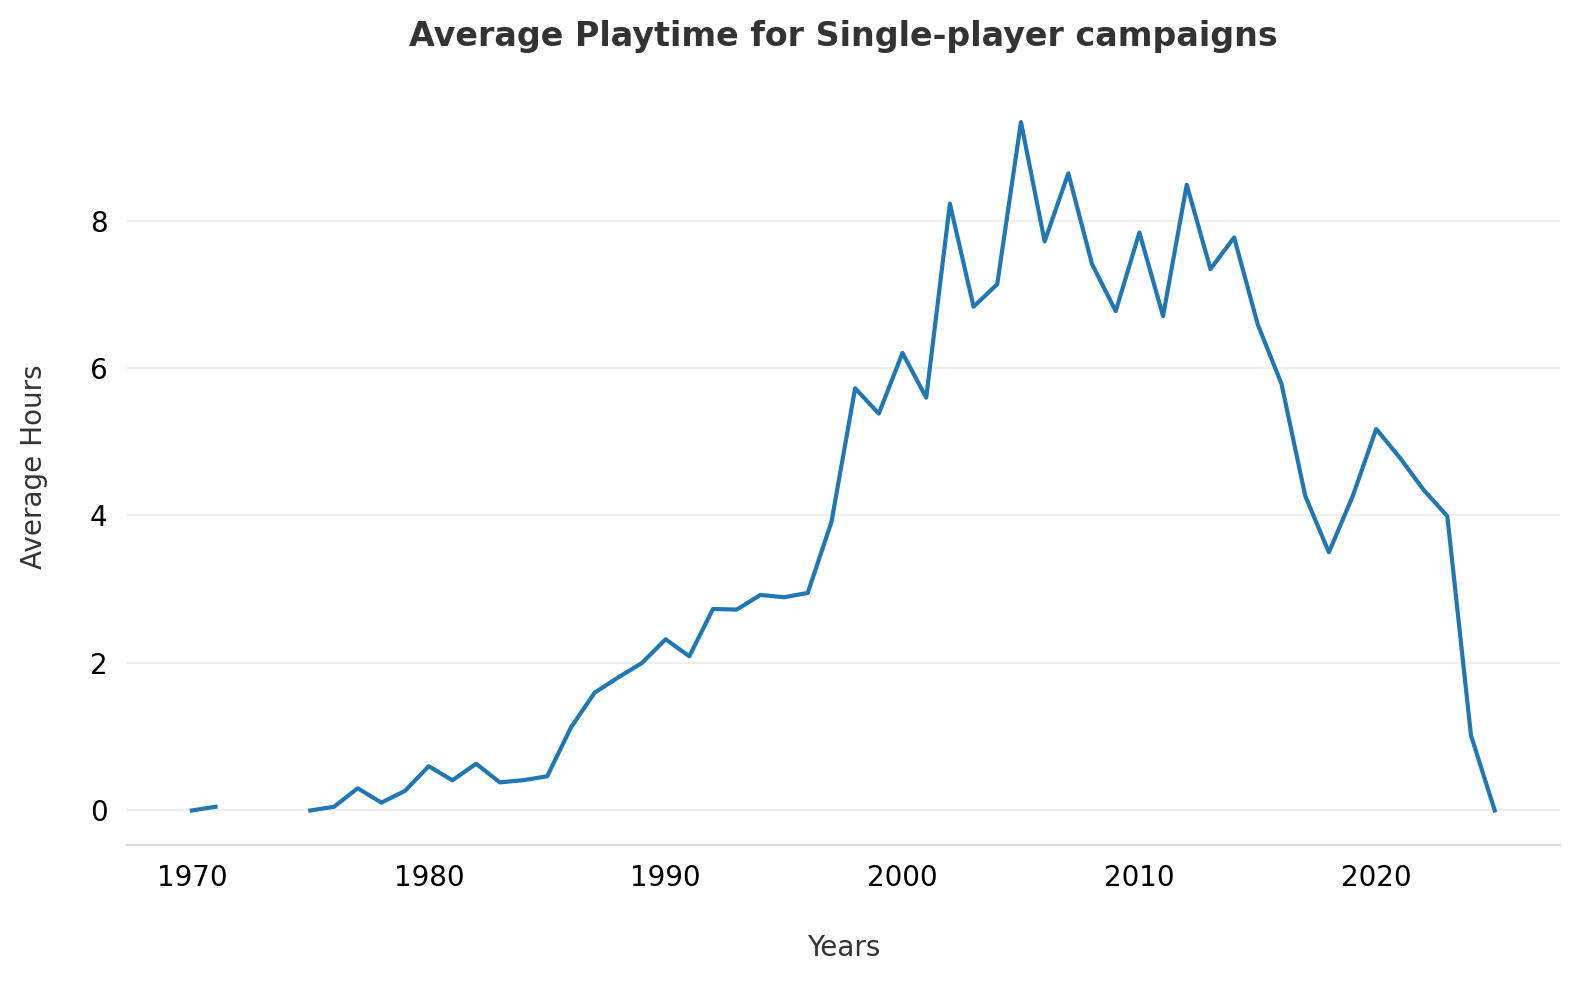

In [20]:
# Set default figure size.
plt.rcParams['figure.figsize'] = (8, 5)

fig, ax = plt.subplots()

ax.plot(
    df_final[['Release_date','Single-Player_Main Story_Average']].set_index(
        'Release_date').resample('Y').mean()
)
# Remove the top, right and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
# Add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
# Add labels and a title.
# extra space between the text and the tick labels.
ax.set_xlabel('Years', labelpad=15, color='#333333')
ax.set_ylabel('Average Hours', labelpad=15, color='#333333')
ax.set_title('Average Playtime for Single-player campaigns', pad=15, color='#333333',
             weight='bold')


fig.tight_layout()

Single Player gaming hours have dropped tremendously since mid 2000s. The amount of hours spend in video game story mode is back to when it was in the late 90s. Long are the days of having many single player story-driven games and playing hundreds of hours in them

Identifying outliers  

In [21]:
df_final[['Name', 'Release_date','Single-Player_Main Story_Average' ]].set_index(
    'Release_date').resample(
        'Y').mean().sort_values(by= 'Single-Player_Main Story_Average', ascending = False).dropna().head(20)

,Single-Player_Main Story_Average
Release_date,
2004-12-31,9.334694
2006-12-31,8.639970
2011-12-31,8.485527
2001-12-31,8.228098
2009-12-31,7.837121
2013-12-31,7.769490
2005-12-31,7.716764
2007-12-31,7.409822
2012-12-31,7.342423


In [22]:
df_final.loc[(df_final.Release_date > '2004-01-01') & (df_final.Release_date < '2005-01-01')][['Name', 'Single-Player_Main Story_Average']].sort_values(
    by= 'Single-Player_Main Story_Average', ascending = False).head(20)

,Name,Single-Player_Main Story_Average
18233,Lineage II,1617.466667
5271,Gran Turismo 4,78.500000
150,Garry's Mod,64.316667
20214,Football Manager 2005,63.333333
3809,Clannad,63.050000
6355,Fate/stay night,62.716667
2021,Dragon Quest VIII: Journey of the Cursed King,61.316667
22878,Mobile Suit Gundam SEED: Never Ending Tomorrow,55.350000
13923,Magna Carta: Tears of Blood,52.433333
6919,Monster Hunter,47.366667


Total time spent playing Single-Player games

In [23]:
df_final[['Release_date','Single-Player_All PlayStyles_Average']].set_index(
        'Release_date').resample('Y').sum().sort_values(
                by = 'Single-Player_All PlayStyles_Average', ascending=False).head(20)

,Single-Player_All PlayStyles_Average
Release_date,
2016-12-31,45284.300000
2019-12-31,38783.016667
2017-12-31,37442.650000
2015-12-31,36367.766667
2018-12-31,34417.816667
2020-12-31,33128.683333
2014-12-31,26663.933333
2021-12-31,25705.300000
2012-12-31,22393.083333


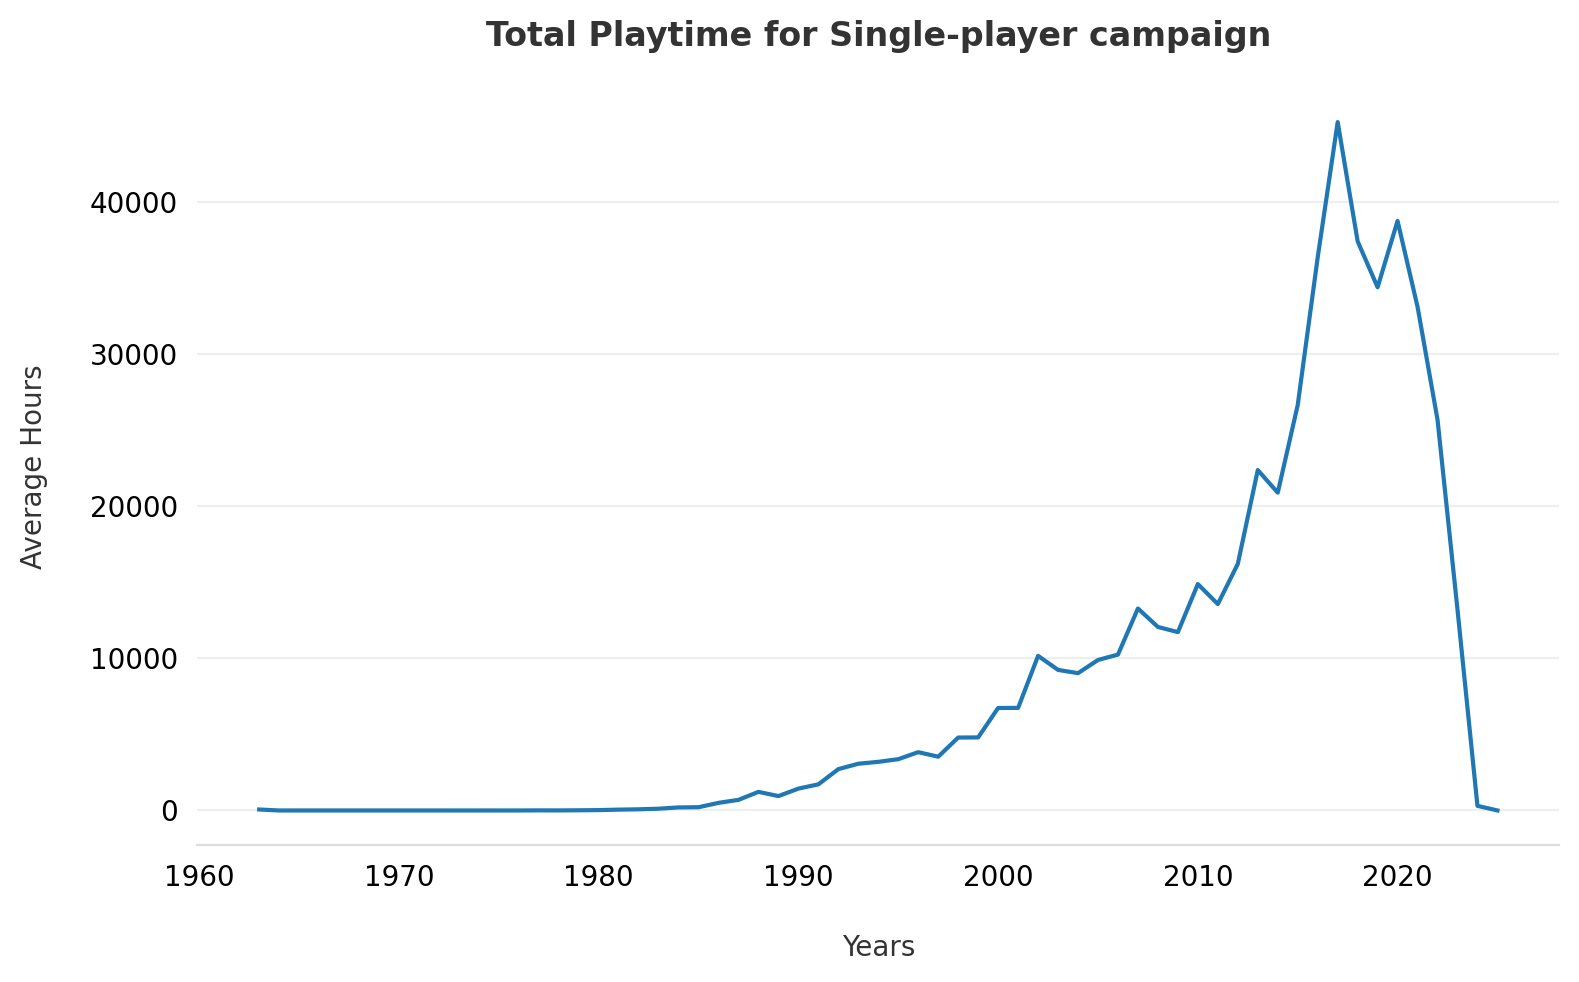

In [24]:
# Set default figure size.
plt.rcParams['figure.figsize'] = (8, 5)
fig, ax = plt.subplots()

ax.plot(
    df_final[['Release_date','Single-Player_All PlayStyles_Average']].set_index(
        'Release_date').resample('Y').sum()
)
# Remove the top, right and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
# Add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
# Add labels and a title.
# extra space between the text and the tick labels.
ax.set_xlabel('Years', labelpad=15, color='#333333')
ax.set_ylabel('Average Hours', labelpad=15, color='#333333')
ax.set_title('Total Playtime for Single-player campaign', pad=15, color='#333333',
             weight='bold')


fig.tight_layout()

There is an extreme dip in total hours spent playing single-player games

Could it be due to less single-player games being released?

In [25]:
years = [str(i) for i in range(1990, 2025)]
games_per_year = []
for i in range(len(years) - 1):
    total = len(df_final.loc[(df_final['Release_date'] >= years[i]) & (df_final['Release_date'] <= years[i+1])])
    value = {"Years": pd.to_datetime(years[i]).year , "Total_games": total}
    games_per_year.append(value)



games_year_df = pd.DataFrame(games_per_year).set_index(
    'Years') .sort_values(
        by = "Total_games",ascending=False)


print("Highlighting Games after the year 2019\nSorted by Total Amount of Games")
f = lambda v: 'background-color: %s' % 'green' if v>=2019 else ''
games_year_df = games_year_df.reset_index().style.applymap(f, subset=['Years'])
games_year_df.set_table_attributes('style="border-collapse: collapse; border: 1px solid black;"')



Highlighting Games after the year 2019
Sorted by Total Amount of Games


,Years,Total_games
0,2017,5339
1,2016,4664
2,2018,4652
3,2020,3628
4,2019,3358
5,2015,3304
6,2021,3288
7,2014,2300
8,2022,2282
9,2013,1648


It seeems as though the number of games truly has decreased since 2018 by over than 1000 game, and almost 2000 games since 2017. Or at least the number of games worth inputting into the website

Has the quality of games or review scores dipped as well?

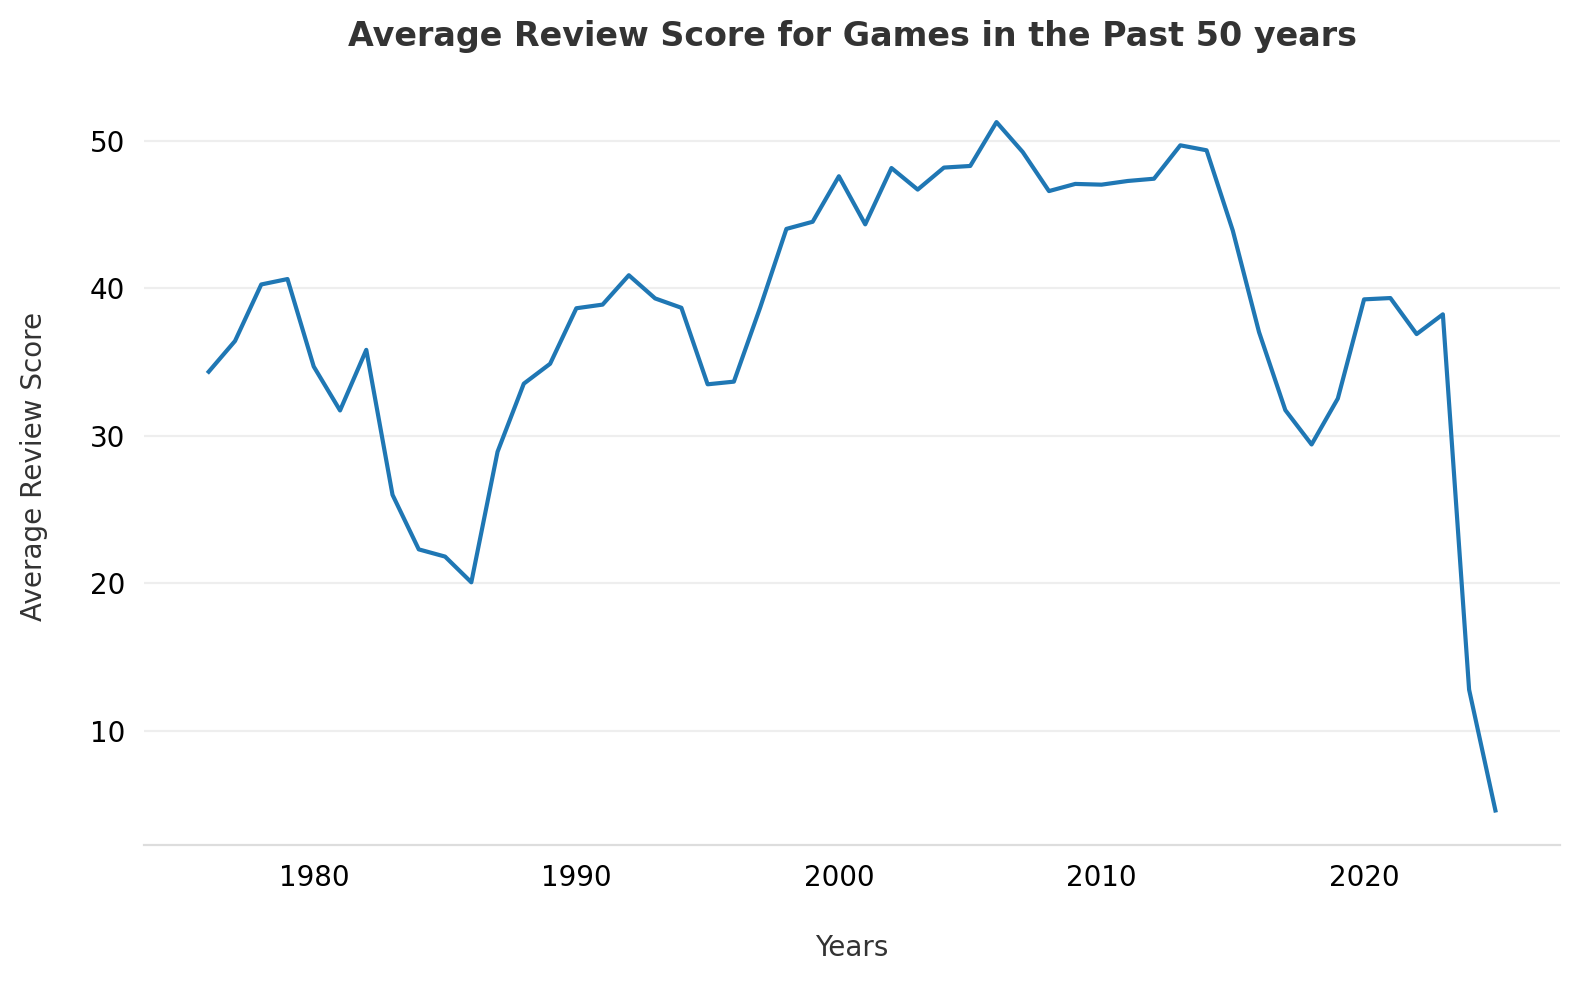

In [26]:
fig, ax = plt.subplots()
   
ax.plot(
   df_final[['Release_date', 'Review_score']].set_index(
    'Release_date').resample('Y').mean().sort_values(
        by = 'Release_date', ascending= False
    ).head(50)
)
# Remove the top, right and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
# Add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
# Add labels and a title.
# extra space between the text and the tick labels.
ax.set_xlabel('Years', labelpad=15, color='#333333')
ax.set_ylabel('Average Review Score', labelpad=15, color='#333333')
ax.set_title('Average Review Score for Games in the Past 50 years', pad=15, color='#333333',
             weight='bold')


fig.tight_layout()

Early 2000s to late 2010s seem to be the golden age for gaming

In [27]:
#test = '52½ Hours'

def convert_2(x):
    if x and isinstance(x, str):
        if '½' in x:
            clean = x.replace('½', '').split()
            clean = [int(i) for i in clean if i.isdigit()]
            return clean[0] + .5
        else:
            clean = x.split()
            clean = [int(i) for i in clean if i.isdigit()]
            return clean[0]
    else:
        return np.nan

        
#convert_2(test)

## Multiplayer Playtime Analysis

In [28]:
df_final['Multi-Player_Competitive_Average'] = df_final['Multi-Player_Competitive_Average'].apply(lambda x: convert_2(x))

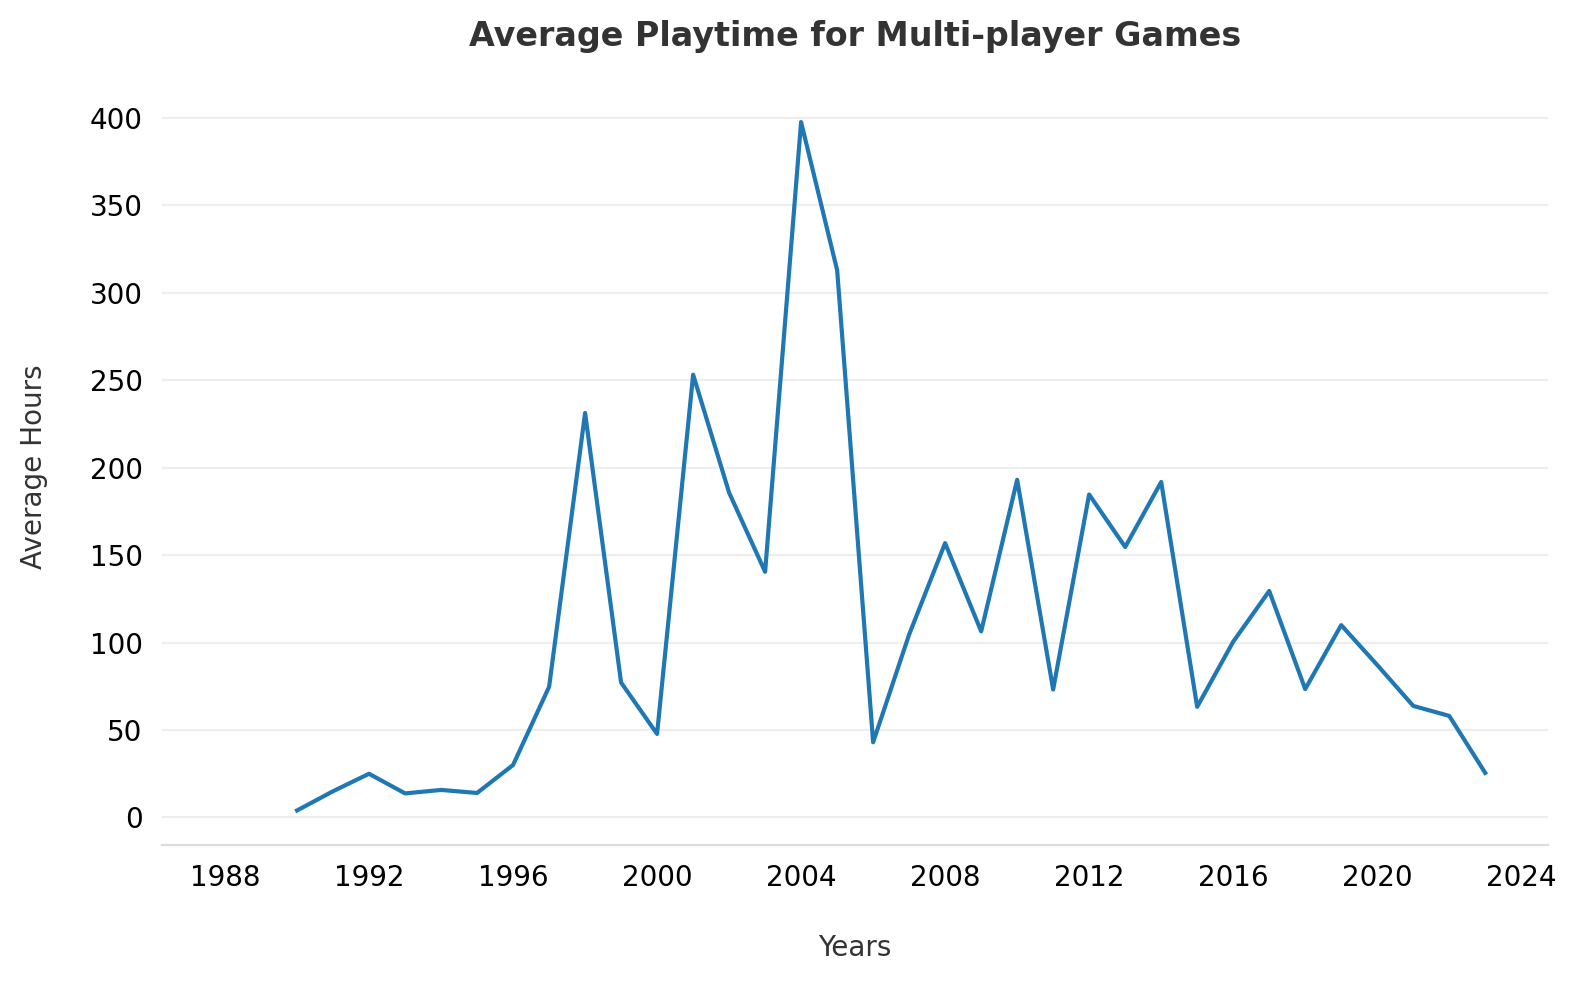

In [29]:
fig, ax = plt.subplots()

ax.plot(
    df_final[['Release_date','Multi-Player_Competitive_Average']].set_index(
    'Release_date').resample('Y').mean()
)

# Remove the top, right and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
# Add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
# Add labels and a title.
# extra space between the text and the tick labels.
ax.set_xlabel('Years', labelpad=15, color='#333333')
ax.set_ylabel('Average Hours', labelpad=15, color='#333333')
ax.set_title('Average Playtime for Multi-player Games', pad=15, color='#333333',
             weight='bold')


fig.tight_layout()

Multiplayer gaming time has also decreased, similar to what it was back in 1995, even lesser than singleplayer games. It seems as though spending time in games has generally decreased over times and is on a downward trend

In [30]:
df_final[['Name', 'Release_date','Multi-Player_Competitive_Average']].set_index(
    'Release_date').resample(
        'Y').mean(      
        ).sort_values(
            by='Multi-Player_Competitive_Average', ascending = False ).head(20)

,Multi-Player_Competitive_Average
Release_date,
2003-12-31,397.700000
2004-12-31,312.968750
2000-12-31,253.235294
1997-12-31,231.333333
2009-12-31,193.090909
2013-12-31,191.870690
2001-12-31,185.750000
2011-12-31,184.704545
2007-12-31,156.900000


In [31]:
df_final[['Name', 'Release_date', 'Multi-Player_Competitive_Average']].set_index(
    'Release_date').resample('Y').sum().sort_values(
        by = 'Multi-Player_Competitive_Average', ascending = False).head(20)


,Multi-Player_Competitive_Average
Release_date,
2013-12-31,11128.5
2012-12-31,8972.5
2011-12-31,8127.0
2003-12-31,7954.0
2009-12-31,6372.0
2016-12-31,5311.0
2004-12-31,5007.5
2000-12-31,4305.0
2018-12-31,4070.5


Let's investigate year 2003 more

In [32]:
df_final[['Name', 'Release_date','Multi-Player_Competitive_Average']].loc[(df_final.Release_date> '2003-01-01') & (df_final.Release_date< '2004-01-01')].dropna(
).sort_values(by= 'Multi-Player_Competitive_Average', ascending= False).head(20)

,Name,Release_date,Multi-Player_Competitive_Average
10438,Freelancer,2003-03-04,2650.0
5225,Ragnarok Online,2003-06-01,2059.0
1676,Eve Online,2003-05-06,1250.0
245,Star Wars Jedi Knight: Jedi Academy,2003-09-17,618.0
4322,Star Conflict,2003-02-27,500.0
3751,Warcraft III: The Frozen Throne,2003-07-01,438.0
8930,Command & Conquer: Generals - Zero Hour,2003-09-22,147.0
5976,Command & Conquer: Generals,2003-02-10,46.0
3708,Mario Kart: Double Dash!!,2003-11-07,35.0
20883,SNK vs. Capcom: SVC Chaos,2003-07-24,34.0


2004 was a very interesting year for Multiplayer gaming

## Consoles Analysis

In [33]:
df_final['Single-Player_All PlayStyles_Average'] = df_final['Single-Player_All PlayStyles_Average'].astype(str).apply(lambda x: hours(x))

In [34]:
total =  df.Stats.apply(lambda x: convert(x)).to_list()
consoles_list_edit = [f'Platform_{i}_Main' for i in consoles_list]
consoles_keep= []
for g in total:
    temp = {}
    for i in consoles_list_edit:
        for h in g:
            temp.update({i: g.get(i, '')})
    consoles_keep.append(temp)           

In [35]:
consoles_list_edit

['Platform_Xbox_Main',
 'Platform_TurboGrafx-16_Main',
 'Platform_Sega 32X_Main',
 'Platform_Tiger Handheld_Main',
 'Platform_Nintendo Switch_Main',
 'Platform_Super Nintendo_Main',
 'Platform_Sega CD_Main',
 'Platform_Plug & Play_Main',
 'Platform_Interactive Movie_Main',
 'Platform_Wii U_Main',
 'Platform_Neo Geo Pocket_Main',
 'Platform_Xbox 360_Main',
 'Platform_NEC PC-98_Main',
 'Platform_Atari 8-bit Family_Main',
 'Platform_Game Boy_Main',
 'Platform_TurboGrafx-CD_Main',
 'Platform_Gear VR_Main',
 'Platform_Atari ST_Main',
 'Platform_Neo Geo_Main',
 'Platform_PlayStation Vita_Main',
 'Platform_NEC PC-FX_Main',
 'Platform_Mobile_Main',
 'Platform_Sharp X1_Main',
 'Platform_BBC Micro_Main',
 'Platform_NES_Main',
 'Platform_Commodore 64_Main',
 'Platform_ZX Spectrum_Main',
 'Platform_Amiga_Main',
 'Platform_Atari 5200_Main',
 'Platform_Xbox Series X/S_Main',
 'Platform_Nintendo DS_Main',
 'Platform_Sega Saturn_Main',
 'Platform_PlayStation 2_Main',
 'Platform_Odyssey_Main',
 'Platfo

In [36]:
consoles_df = pd.concat([
    df.drop(columns=['steam_app_id', 'Stats']), 
    pd.DataFrame(consoles_keep).rename(columns = {i:i.split('_')[1] for i in consoles_list_edit})
                         ],axis=1)
consoles_df.columns

Index(['Name', 'Release_date', 'Genres', 'Review_score', 'Xbox',
       'TurboGrafx-16', 'Sega 32X', 'Tiger Handheld', 'Nintendo Switch',
       'Super Nintendo', 'Sega CD', 'Plug & Play', 'Interactive Movie',
       'Wii U', 'Neo Geo Pocket', 'Xbox 360', 'NEC PC-98',
       'Atari 8-bit Family', 'Game Boy', 'TurboGrafx-CD', 'Gear VR',
       'Atari ST', 'Neo Geo', 'PlayStation Vita', 'NEC PC-FX', 'Mobile',
       'Sharp X1', 'BBC Micro', 'NES', 'Commodore 64', 'ZX Spectrum', 'Amiga',
       'Atari 5200', 'Xbox Series X/S', 'Nintendo DS', 'Sega Saturn',
       'PlayStation 2', 'Odyssey', 'PlayStation', 'PlayStation Now',
       'Amstrad CPC', 'Arcade', 'PlayStation VR', '3DO', 'Game Boy Color',
       'FM Towns', 'Neo Geo CD', 'Google Stadia', 'Sharp X68000',
       'PlayStation Portable', 'PC', 'Philips CD-i', 'Amazon Luna', 'Wii',
       'N-Gage', 'PlayStation 3', 'Atari Jaguar', 'PC VR', 'OnLive',
       'Playdate', 'Atari Lynx', 'Atari 7800', 'Sega Master System',
       'Game Boy 

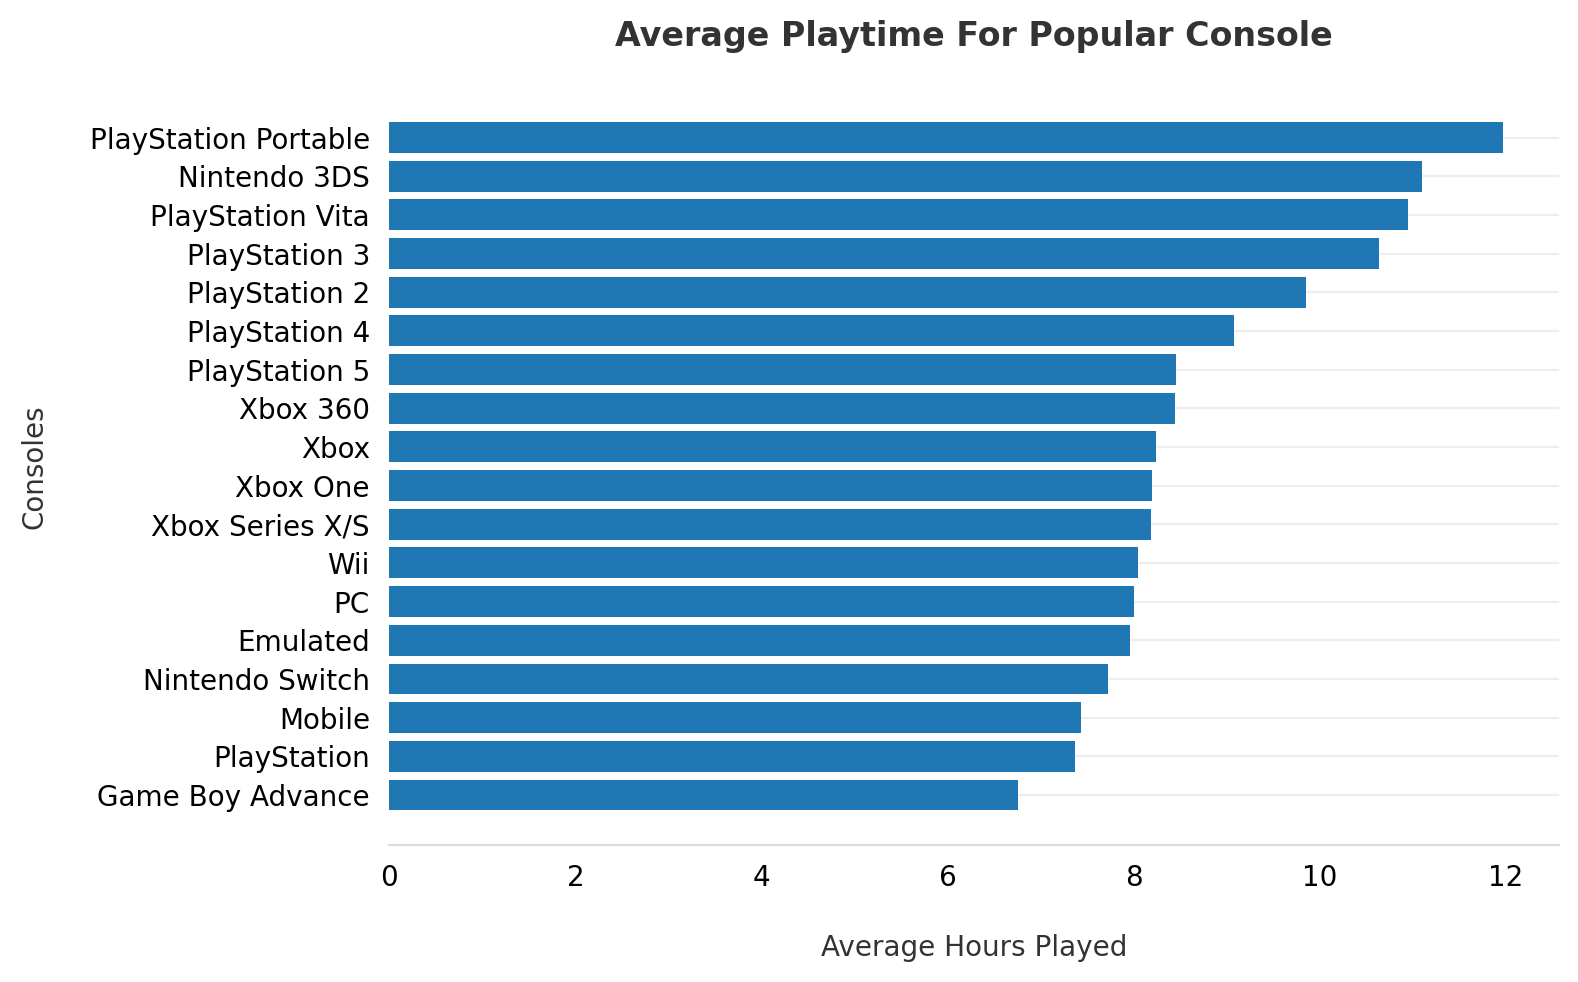

<Figure size 1280x960 with 0 Axes>

In [37]:
top_consoles = [
'PC', 'PlayStation 4', 'PlayStation 5', 
'Xbox One', 'Nintendo 3DS',
'Xbox Series X/S', 'Nintendo Switch',
'Xbox', 'Xbox One', 'Game Boy Advance',
'Mobile', 'Xbox 360', 'PlayStation 3',
'PlayStation 2', 'PlayStation', 'PlayStation Portable',
'PlayStation Vita', 'Emulated', 'Wii', ]

consoles_df_plot = consoles_df[top_consoles].applymap(
    lambda x: hours(x)).mean().sort_values(
        ascending= True)
        
fig, ax = plt.subplots()

ax.barh(
    y= consoles_df_plot.index,
    width=consoles_df_plot.values,
)

# Remove the top, right and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
# Add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
# Add labels and a title.
# extra space between the text and the tick labels.
ax.set_xlabel('Average Hours Played', labelpad=15, color='#333333')
ax.set_ylabel('Consoles', labelpad=15, color='#333333')
ax.set_title('Average Playtime For Popular Console', pad=15, color='#333333',
             weight='bold')
plt.figure(figsize=(16,12), dpi= 80)
fig.tight_layout()


As expected, Playstation owners spend the most time playing singleplayer games, especially in their handhelds

Now an analysis for all the consoles, not just the popular ones

In [38]:
len(consoles_df[list(consoles_list)].applymap(
    lambda x: hours(x)).mean()) 
# There is a lot of consoles

86

## Genre analysis

Text(0.5, 1.0, 'Genres')

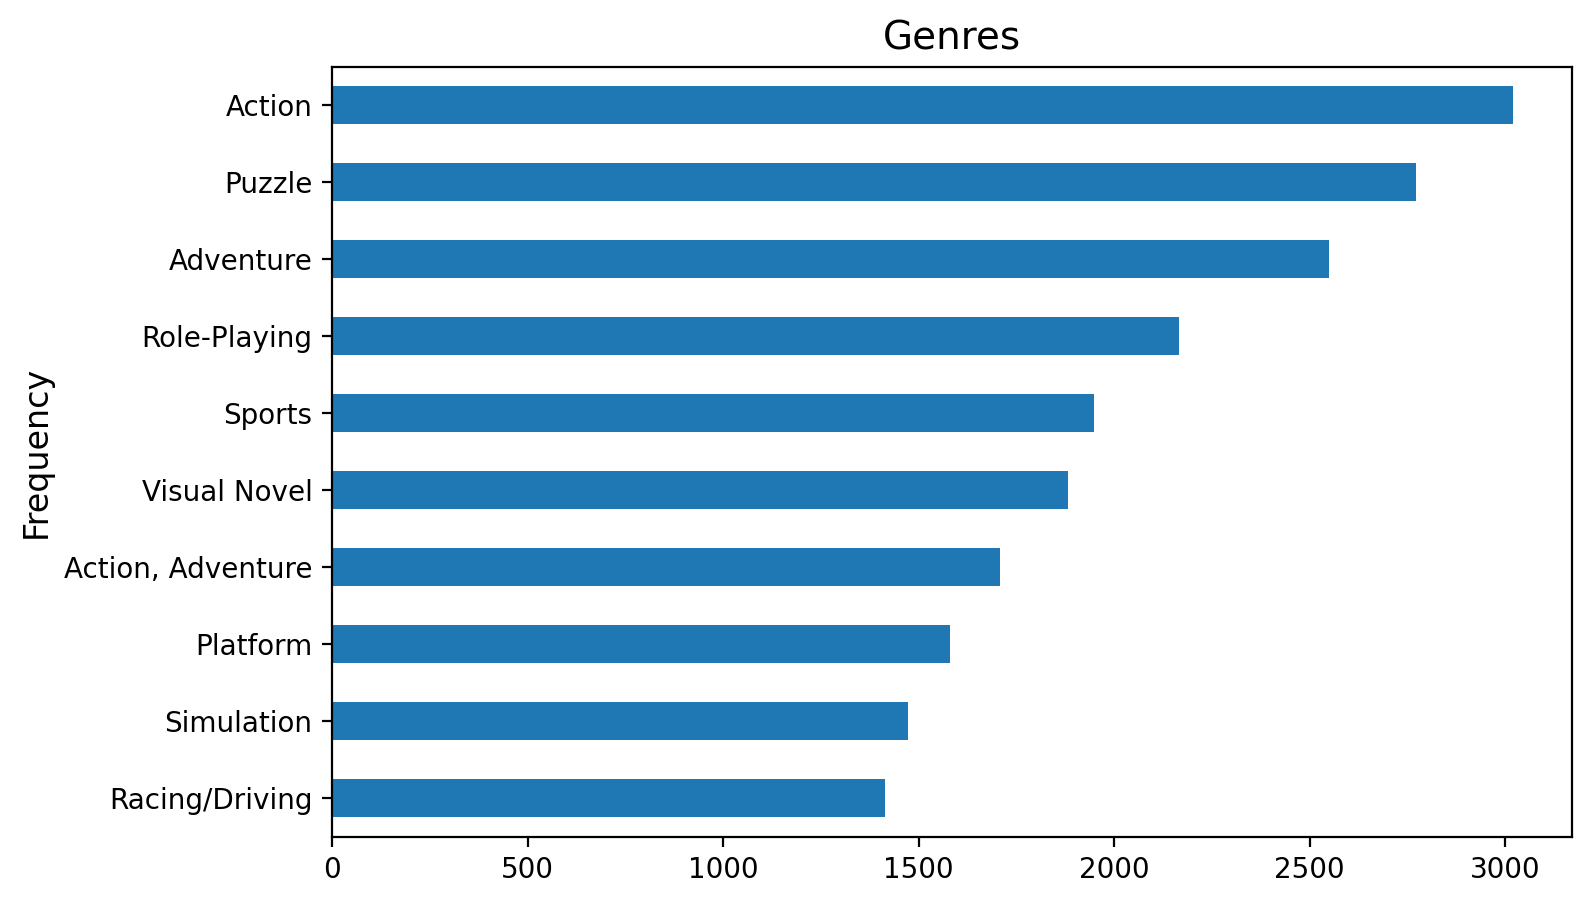

In [39]:
df.Genres.replace('',np.nan).dropna().value_counts().head(10).sort_values(ascending=True).plot(kind='barh')
plt.ylabel("Frequency", size = 12)
plt.title("Genres", size = 14)

Let's create a separate dataframe for genres to make the analysis easier

In [40]:
genres_df = df_final[['Name', 'Release_date', 'Genres', 'Review_score', 'Single-Player_Main Story_Average', 
          'Multi-Player_Competitive_Average']].replace('',np.nan).dropna(subset = ['Genres'])
genres_df.head()

,Name,Release_date,Genres,Review_score,Single-Player_Main Story_Average,Multi-Player_Competitive_Average
0,Borderlands 3,2019-09-13,"First-Person, Action, Shooter",76,23.283333,19.5
1,Dying Light,2015-01-27,"Action, Adventure, Open World, Survival Horror",78,18.166667,99.0
2,Middle-Earth: Shadow of War,2017-10-10,"Action, Adventure",76,20.783333,NaN
3,Counter-Strike: Global Offensive,2012-08-21,"First-Person, Shooter",74,NaN,884.0
4,Grand Theft Auto IV,2008-04-29,"Third-Person, Action, Sandbox, Shooter",82,27.616667,25.5


First let's clean the genres' list

In [41]:
def clean_genres(x):
    genre = x.strip().replace('.','').replace('simulation','simulator')
    if genre in  ('action adventure','action/adventure'):
        genre = 'action-adventure'
    elif 'role-playing' in genre:
        genre = 'action role-playing-game'
    elif 'adventure game' in genre:
        genre = 'adventure'
    elif 'art' in genre:
        genre = 'art'
    elif 'business simulator game' in genre:
        genre = 'business simulator'
    elif genre in ('beat','beat em up'):
        genre = 'beat-em-up'
    elif genre in ('city-builder','city-building','city-building game'):
        genre = 'city-builder'
    elif 'card' in genre:
        genre = 'card game'
    elif genre in ('platform','platform game','platformer'):
        genre = 'platform'
    elif 'family games' in genre:
        genre = 'family'
    elif 'fps' in genre:
        genre = genre.replace('fps', 'first-person-shooter')
    elif 'first person' in genre:
        genre = genre.replace('first person', 'first-person')
    elif genre in ('fighting game', 'fighting action'):
        genre = 'fighting'
    elif  'hack and slash' in genre:
        genre =  'hack-and-slash'
    elif genre in ('life simulator','life simulator game'):
        genre = 'life simulator'
    elif genre in ('light gun shooter','light-gun shooter'):
        genre = 'light-gun shooter'
    elif genre in ('multi-directional shooter','multidirectional shooter'):
        genre = genre.replace('multidirectional', 'multi-directional')
    elif 'minigames' in genre:
        genre = 'mini-games'
    elif genre in ('mmor','mmorole-playing-game', 'mmorole-playing-game' , 'mmorole-playing-game'):
        genre = 'massively multiplayer open-world role-playing-game'
    elif 'moba' in genre:
        genre = 'multiplayer online battle arena' 
    elif 'mecha' in genre:
        genre = genre.replace('mecha', 'mech')
    elif 'point and click' in genre:
        genre =  'point-and-click'
    elif 'professional wrestling' in genre:
        genre = 'professional wrestling fighting'
    elif 'peson' in genre:
        genre = genre.replace('peson', 'person')
    elif genre in ('rpg', 'role playing') :
        genre =  genre.replace('role playing', 'role-playing-game')
        genre = genre.replace('rpg', ' role-playing-game')
    elif 'rts' in genre:
        genre = genre.replace('rts', 'real-time strategy')
    elif 'platforming' in genre:
        genre = 'platform'
    elif'puzzle game' in genre:
        genre = genre.replace('puzzle game', 'puzzle')
    elif genre in ('shoot ','shoot em up','shoot-em-up','shooter','shooters','shooting'): 
        genre = 'shooter'
    elif genre in ('side scroller','side scrolling','side-scroller'):
        genre = 'side-scroller'
    elif genre in ('space combat','space combat sim','space combat simulator'):
        genre = 'space combat simulator' 
    elif genre in ('space simulation','space simulator'):
        genre = 'space simulator'
    elif genre in ('sport','sports'):
        genre = 'sports'
    elif genre in ('stealth','stealth action','stealth-based game','steath'):
        genre = 'stealth-based'
    elif genre in 'strategy rpg':
        genre = 'strategy role-playing-game'
    elif 'tactical role-playing game' in genre:
        genre = 'tactical role-playing'
    elif 'third-person action adventure' in genre:
        genre = 'third-person action-adventure'
    elif 'third person' in genre:
        genre = 'third-person'
    elif '/' in genre:
        genre = ''    
    return genre

In [42]:
all_genres = set([
    g.lower().replace("'","").strip() for i in genres_df.Genres.str.split(',').apply(
        lambda x: [clean_genres(i.lower()) for i in x]) for g in i if g])
# Act like you haven't seen Genre #132 and continue with your analysis...

all_genres

{'2d action platformer',
 '2d puzzle platformer',
 '2d versus fighting',
 '2d weapon based fighting',
 '3-d',
 '3d platformer',
 '4x',
 'action',
 'action (rail shooter)',
 'action driving',
 'action role-playing-game',
 'action rpg',
 'action shooter',
 'action-adventure',
 'ad',
 'adventure',
 'aerial combat',
 'american football',
 'anazign',
 'arcade',
 'arcade shooter',
 'arcade soccer',
 'arcade-style racing',
 'arena fighting',
 'art',
 'augmented reality',
 'battle arena',
 'beat-em-up',
 'beatem up',
 'block-breaker',
 'block-breaking',
 'board game',
 'boat racing',
 'brawler',
 'breakout',
 'breakout clone',
 'business simulator',
 'car combat',
 'card game',
 'casual',
 'chess',
 'cinematic platformer',
 'city-builder',
 'combat',
 'combat flight simulator',
 'combat simulator',
 'comedy-adventure',
 'compilation',
 'console rpg',
 'construction',
 'construction and management simulator',
 'crossover',
 'date simulator',
 'digital pet',
 'driving',
 'driving sandbox',
 'dun

In [43]:
# To do this, it's best to create a new dataframe and transform the data
genres_df['Genres'] = genres_df['Genres'].str.split(',').apply(lambda x: [clean_genres(i) for i in x])

In [44]:
genres_df.head()

,Name,Release_date,Genres,Review_score,Single-Player_Main Story_Average,Multi-Player_Competitive_Average
0,Borderlands 3,2019-09-13,"[First-Person, Action, Shooter]",76,23.283333,19.5
1,Dying Light,2015-01-27,"[Action, Adventure, Open World, Survival Horror]",78,18.166667,99.0
2,Middle-Earth: Shadow of War,2017-10-10,"[Action, Adventure]",76,20.783333,NaN
3,Counter-Strike: Global Offensive,2012-08-21,"[First-Person, Shooter]",74,NaN,884.0
4,Grand Theft Auto IV,2008-04-29,"[Third-Person, Action, Sandbox, Shooter]",82,27.616667,25.5


In [45]:
# I will compile all the genres of the game and the review score that it got.
# Sof if a game has two genres and one review score, the result will be the two genres
# with the same review score
genres = []
for key, values in genres_df['Genres'].items():
    for value in values:
        genres.append({"Name": genres_df['Name'].at[key], 
                       "Genre": value, 
                       "Rating": genres_df['Review_score'].at[key], 
                       "Release_date": genres_df['Release_date'].at[key],
                       "Singleplayer_time": genres_df['Single-Player_Main Story_Average'].at[key],
                       "Multiplayer_time": genres_df['Multi-Player_Competitive_Average'].at[key]})

genres_df_final = pd.DataFrame(genres)
genres_df_final.head()

,Name,Genre,Rating,Release_date,Singleplayer_time,Multiplayer_time
0,Borderlands 3,First-Person,76,2019-09-13,23.283333,19.5
1,Borderlands 3,Action,76,2019-09-13,23.283333,19.5
2,Borderlands 3,Shooter,76,2019-09-13,23.283333,19.5
3,Dying Light,Action,78,2015-01-27,18.166667,99.0
4,Dying Light,Adventure,78,2015-01-27,18.166667,99.0


In [46]:
genres_review =  genres_df_final.groupby(
    ['Genre'])['Rating'].mean().replace(
        '',np.nan).dropna().sort_values(ascending=False)

In [47]:
genres_review.head(20)

Genre
Shoot                         90.00
War                           90.00
Mecha                         90.00
strategy role-playing-game    83.00
Simulator                     83.00
Submarine adventure           83.00
American football             82.00
arcade                        81.00
Dungeon Crawl                 81.00
run and gun                   81.00
Ad                            80.00
Tactical Wargame              80.00
Third person action puzzle    80.00
Shoot em' up                  80.00
Arena Fighting                80.00
Turn based strategy           80.00
Fighting game                 80.00
Submarine simulator           80.00
Space combat simulator        79.50
Puzzle game                   79.25
Name: Rating, dtype: float64

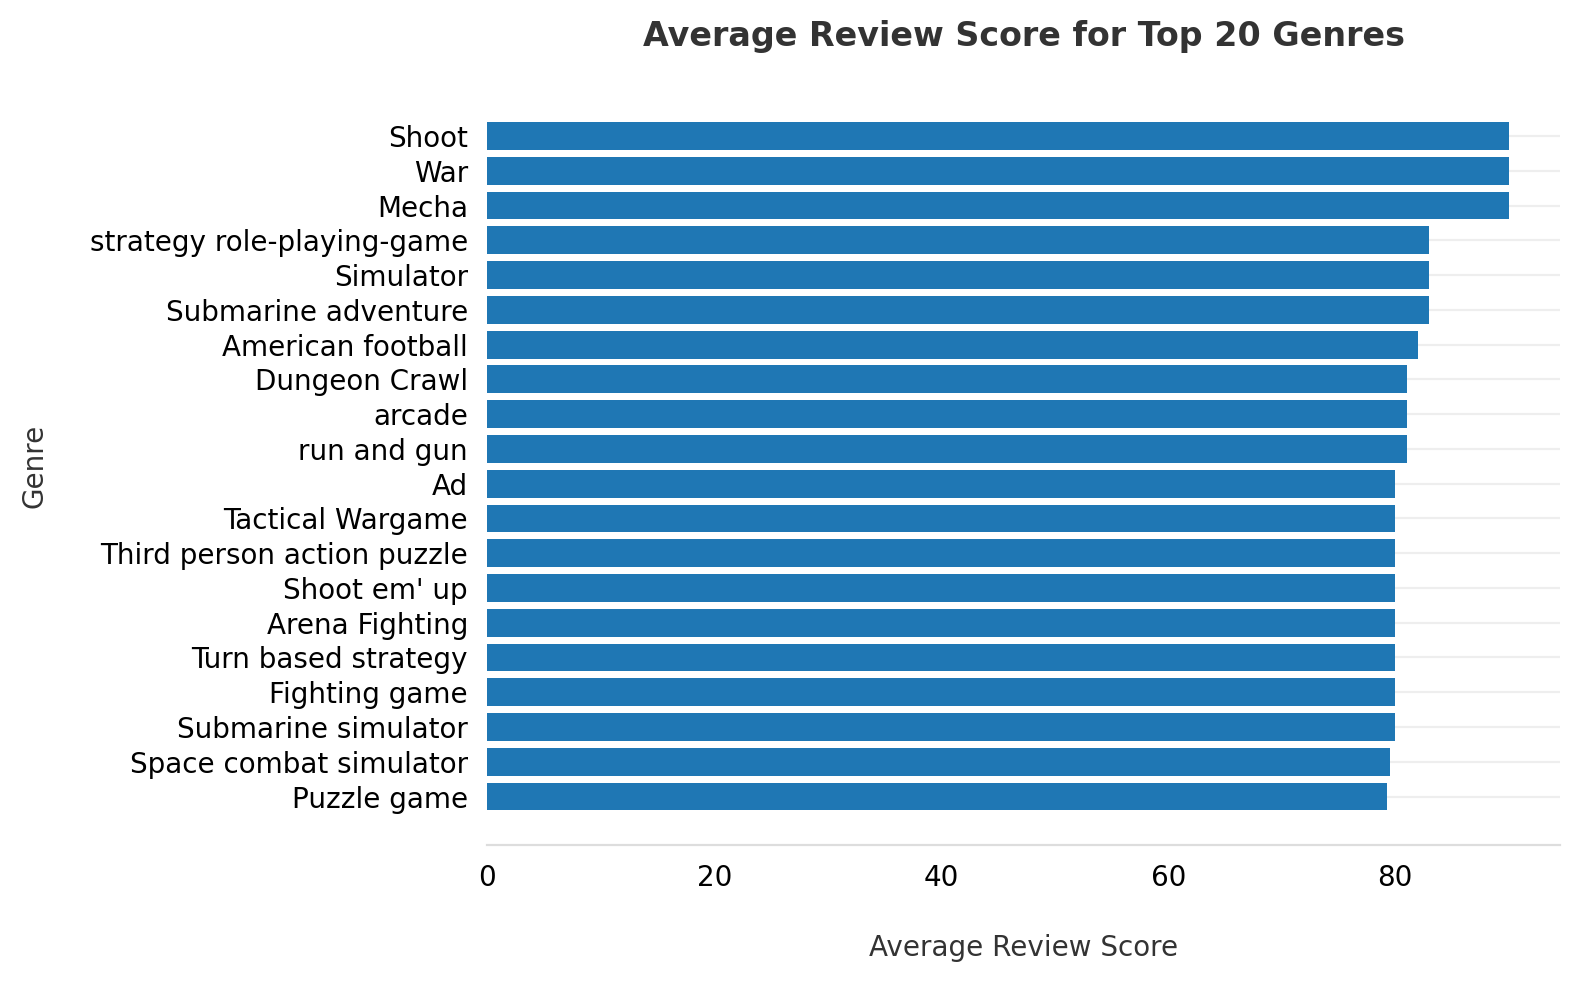

<Figure size 1280x960 with 0 Axes>

In [48]:
fig, ax = plt.subplots()

ax.barh(
    y= genres_review.head(20).sort_values(ascending=True).index,
    width=genres_review.head(20).sort_values(ascending=True).values,
)

# Remove the top, right and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
# Add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
# Add labels and a title.
# extra space between the text and the tick labels.
ax.set_xlabel('Average Review Score', labelpad=15, color='#333333')
ax.set_ylabel('Genre', labelpad=15, color='#333333')
ax.set_title('Average Review Score for Top 20 Genres', pad=15, color='#333333',
             weight='bold')
plt.figure(figsize=(16,12), dpi= 80)
fig.tight_layout()
plt.show()

It seems shooting and war game genres are rated the highest amongst gamers

What about playtime? Which genre do gamers typically spend the most time playing?

In [49]:
genres_playtime =  genres_df_final.groupby(
    ['Genre'])['Singleplayer_time'].mean().replace(
        '',np.nan).sort_values(ascending=False).dropna()
genres_playtime.head(10)

Genre
Submarine simulator    84.050000
Strategy RPG           42.383333
Farm simulator         40.000000
Role playing           38.762500
digital pet            34.016667
Steampunk              32.216667
Role-playing game      30.183333
Simulator              30.116667
Puzzle RPG             29.850000
Driving Sandbox        28.600000
Name: Singleplayer_time, dtype: float64

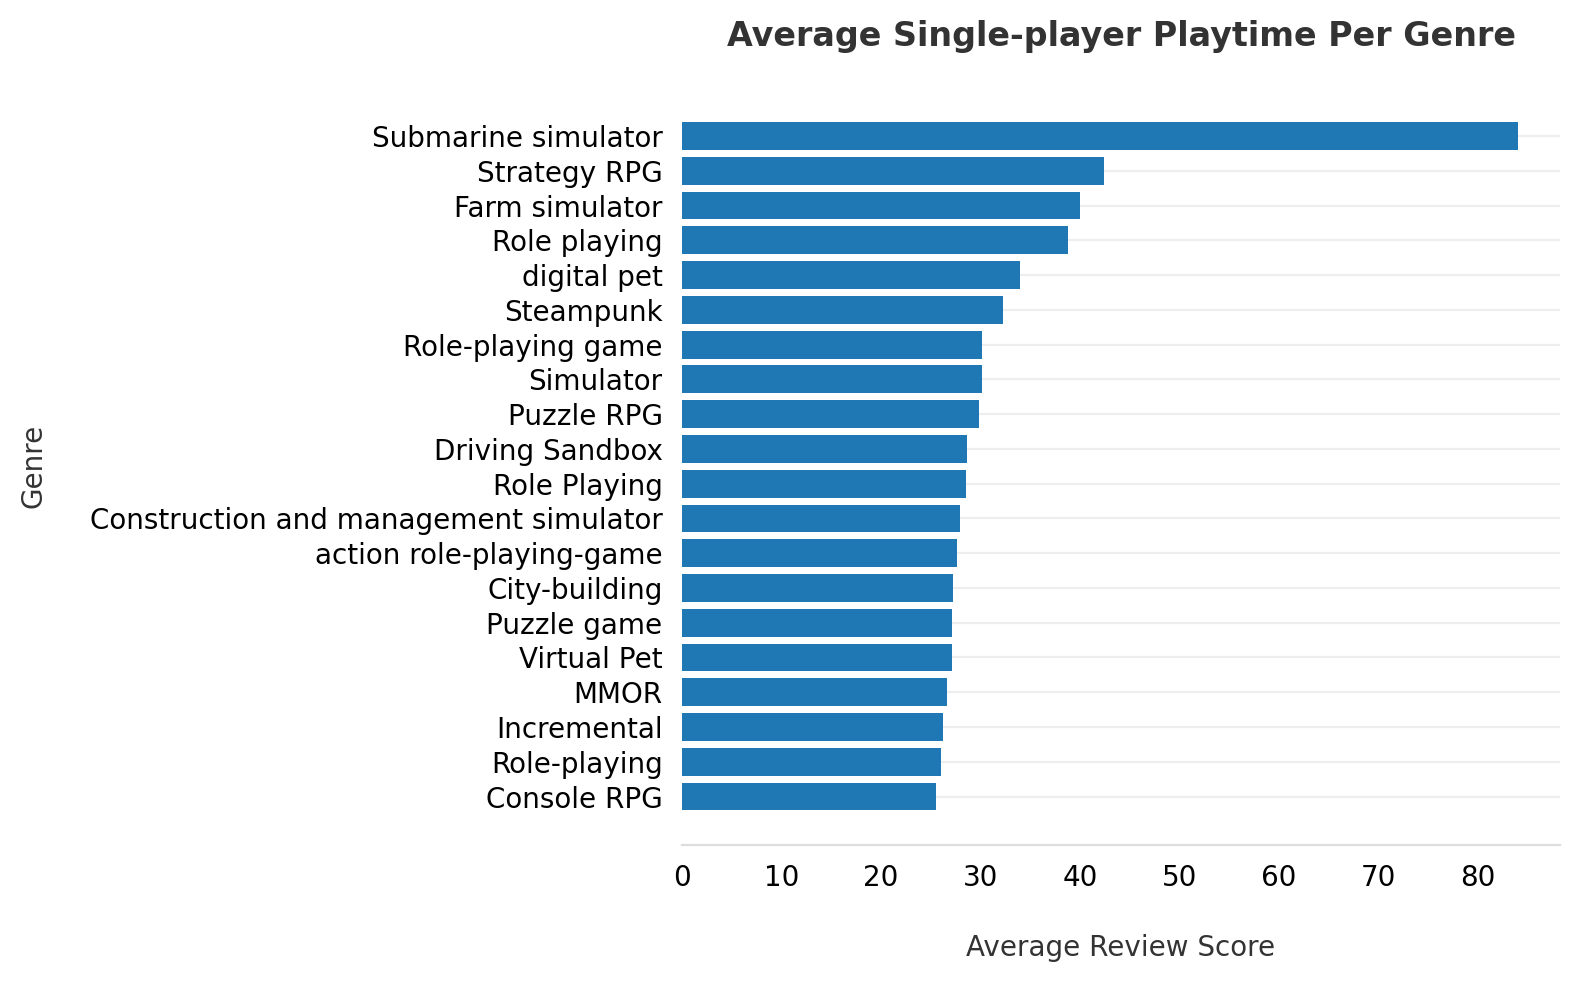

<Figure size 1280x960 with 0 Axes>

In [50]:
fig, ax = plt.subplots()

ax.barh(
    y= genres_playtime.head(20).sort_values(ascending=True).index,
    width=genres_playtime.head(20).sort_values(ascending=True).values,
)

# Remove the top, right and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
# Add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
# Add labels and a title.
# extra space between the text and the tick labels.
ax.set_xlabel('Average Review Score', labelpad=15, color='#333333')
ax.set_ylabel('Genre', labelpad=15, color='#333333')
ax.set_title('Average Single-player Playtime Per Genre', pad=15, color='#333333',
             weight='bold')
plt.figure(figsize=(16,12), dpi= 80)
fig.tight_layout()
plt.show()

Simulator and strategy players spend almost 4x more time playing that all other genres